In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# بارگذاری داده‌ها
data = fetch_california_housing()
X = data.data  # ویژگی‌ها
y = data.target.reshape(-1, 1)  # تبدیل هدف به ماتریس

# استانداردسازی داده‌ها
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_b = np.c_[np.ones((X_scaled.shape[0], 1)), X_scaled]  # افزودن بایاس

m = X_b.shape[0]  # تعداد نمونه‌ها

Theta (Batch Gradient Descent): [[ 2.06855817e+00]
 [ 7.40904659e-01]
 [ 1.53569295e-01]
 [-1.68169024e-03]
 [ 4.51982176e-02]
 [ 9.31456754e-03]
 [-4.03799788e-02]
 [-7.29380857e-01]
 [-6.85055444e-01]]


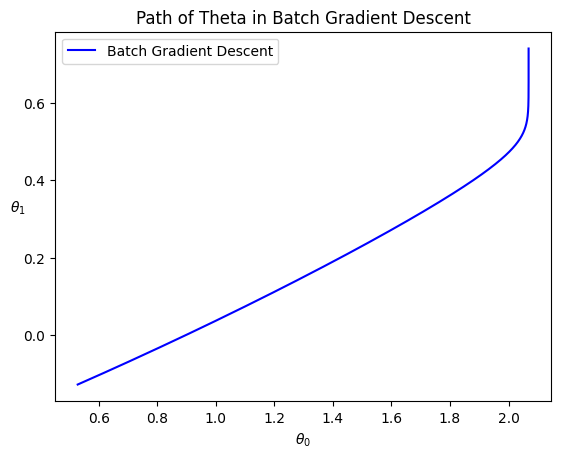

In [10]:
# تنظیمات اولیه
learning_rate = 0.01
n_iterations = 1000
np.random.seed(42)  # هر عدد ثابت دیگری نیز می‌تواند باشد

theta = np.random.randn(X_b.shape[1], 1)

# ذخیره مسیر برای Batch Gradient Descent
theta_path_bgd = []

# الگوریتم Batch Gradient Descent
for iteration in range(n_iterations):
    gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - learning_rate * gradients
    theta_path_bgd.append(theta.copy())

print("Theta (Batch Gradient Descent):", theta)

# رسم مسیر همگرایی برای Batch Gradient Descent
theta_path_bgd = np.array(theta_path_bgd)
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-", label="Batch Gradient Descent")
plt.xlabel(r"$\theta_0$")
plt.ylabel(r"$\theta_1$", rotation=0)
plt.legend()
plt.title("Path of Theta in Batch Gradient Descent")
plt.show()

Theta (Stochastic Gradient Descent): [[ 2.07074491]
 [ 0.86206258]
 [ 0.09616402]
 [-0.3783594 ]
 [ 0.42297977]
 [-0.01251968]
 [-0.03977074]
 [-1.03621604]
 [-1.01753973]]


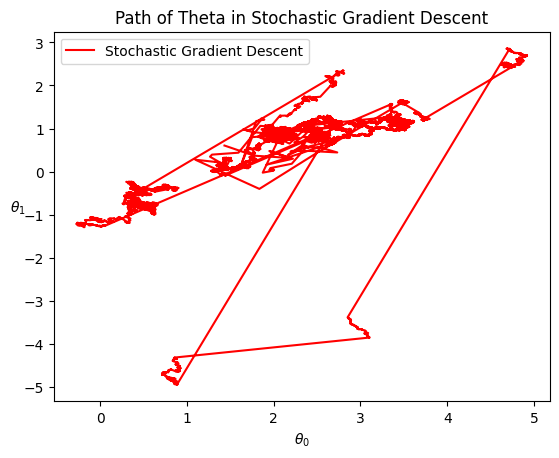

In [12]:
# تنظیمات اولیه برای Stochastic Gradient Descent
n_epochs = 50
t0, t1 = 5, 50  # پارامترهای نرخ یادگیری

def learning_schedule(t):
    return t0 / (t + t1)

np.random.seed(42) 

theta = np.random.randn(X_b.shape[1], 1)
theta_path_sgd = []

# الگوریتم Stochastic Gradient Descent
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index + 1]
        yi = y[random_index:random_index + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta.copy())

print("Theta (Stochastic Gradient Descent):", theta)

# رسم مسیر همگرایی برای Stochastic Gradient Descent
theta_path_sgd = np.array(theta_path_sgd)
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-", label="Stochastic Gradient Descent")
plt.xlabel(r"$\theta_0$")
plt.ylabel(r"$\theta_1$", rotation=0)
plt.legend()
plt.title("Path of Theta in Stochastic Gradient Descent")
plt.show()


Theta (Mini-Batch Gradient Descent): [[ 2.06142523]
 [ 0.52134207]
 [ 0.22717854]
 [ 0.61993608]
 [-0.56883761]
 [ 0.02041465]
 [ 0.05445352]
 [-0.30341598]
 [-0.22037649]]


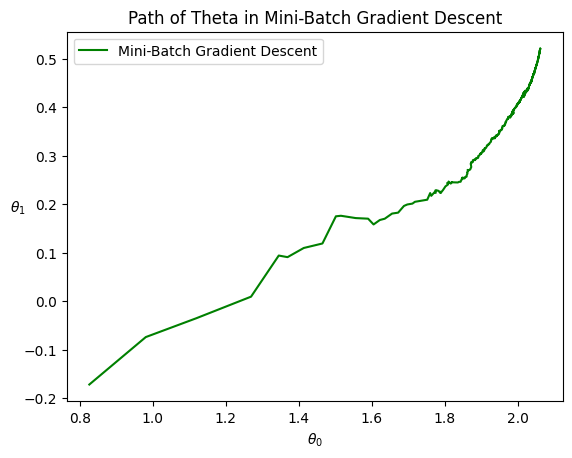

In [15]:
# تنظیمات اولیه برای Mini-Batch Gradient Descent
mini_batch_size = 20
np.random.seed(42)  

theta = np.random.randn(X_b.shape[1], 1)
theta_path_mgd = []

# الگوریتم Mini-Batch Gradient Descent
for epoch in range(n_epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, mini_batch_size):
        xi = X_b_shuffled[i:i + mini_batch_size]
        yi = y_shuffled[i:i + mini_batch_size]
        gradients = 2 / mini_batch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta.copy())

print("Theta (Mini-Batch Gradient Descent):", theta)

# رسم مسیر همگرایی برای Mini-Batch Gradient Descent
theta_path_mgd = np.array(theta_path_mgd)
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-", label="Mini-Batch Gradient Descent")
plt.xlabel(r"$\theta_0$")
plt.ylabel(r"$\theta_1$", rotation=0)
plt.legend()
plt.title("Path of Theta in Mini-Batch Gradient Descent")
plt.show()
